# **MNIST DIGITS CLASSIFICATION USING CNN**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models

In [ ]:
(x_train, y_train), (x_test, y_test)=  tf.keras.datasets.mnist.load_data()
#loads the data
#divides the data as input and output
#split the data

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

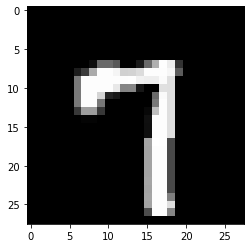

Output:7


In [ ]:
#visualizing the training data
import matplotlib.pyplot as plt
i= 2344
plt.imshow(x_train[i],cmap='gray')
plt.show()
print(f'Output:{ y_train[i]}')

**Normalising the Training and Testing data**

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0].min()

0

In [ ]:
x_train.max()

255

In [ ]:
#Normalisation
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0].min()

0.0

In [ ]:
x_train[0].max()

1.0

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

**CNN Creation and Training**

In [ ]:
#Model Creation (adding layers)
model = models.Sequential()
model.add(layers.Conv2D(filters = 64, kernel_size= (3,3),activation ='relu' , input_shape=(28,28,1)) )
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters = 64, kernel_size= (3,3),activation ='relu') )
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters = 64, kernel_size= (3,3),activation ='relu') )
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 64)        

In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics= ['accuracy'])

In [ ]:
#training the data
history = model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 13s 8ms/step - loss: 0.2863 - accuracy: 0.9115 - val_loss: 0.1030 - val_accuracy: 0.9689
Epoch 2/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0932 - accuracy: 0.9710 - val_loss: 0.0934 - val_accuracy: 0.9716
Epoch 3/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.0635 - val_accuracy: 0.9811
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0596 - val_accuracy: 0.9829
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0607 - val_accuracy: 0.9824


In [ ]:
#Evaluating loss and accuracy on test data
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0605 - accuracy: 0.9833


[0.060486432164907455, 0.983299970626831]

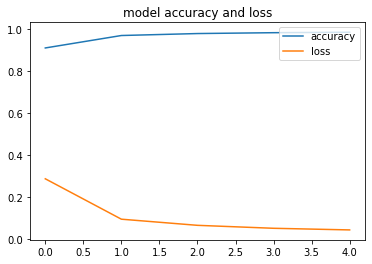

In [ ]:
#Visualizing model accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.legend(['accuracy','loss'],loc = 'upper right')
plt.show()

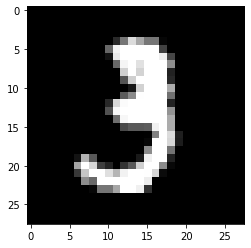

In [ ]:
i = 10
plt.imshow(x_train[i], cmap='gray') #ith image

**Prediction**

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[0]

array([1.3301889e-06, 1.9643676e-05, 9.3148039e-05, 3.1395979e-05,
       1.7417785e-06, 2.9782575e-07, 9.8453100e-11, 9.9983406e-01,
       1.3952624e-07, 1.8244153e-05], dtype=float32)

In [ ]:
y_pred= np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
y_predicted = [np.argmax(i) for i in y_pred]
y_predicted[10]

0

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred ,y_test)*100

98.56

In [ ]:
confusion_matrix(y_pred, y_test)

array([[ 975,    0,    6,    0,    1,    0,    4,    3,    1,    5],
       [   1, 1134,    1,    0,    0,    0,    3,    7,    1,    0],
       [   2,    0, 1015,    3,    1,    0,    0,   24,    1,    0],
       [   0,    1,    0, 1003,    0,    3,    0,    7,    1,    0],
       [   0,    0,    1,    0,  975,    0,    1,    1,    2,   10],
       [   0,    0,    0,    3,    1,  886,    2,    1,    1,   10],
       [   1,    0,    2,    0,    1,    2,  947,    0,    0,    1],
       [   1,    0,    6,    1,    0,    1,    0,  983,    0,    1],
       [   0,    0,    1,    0,    2,    0,    1,    0,  966,   10],
       [   0,    0,    0,    0,    1,    0,    0,    2,    1,  972]])

In [ ]:
model.save('mnsit.hdf5') #saves the neural network architecture and its weights can be reused elsewhere